# FIT5196-S2-2020 Assessment 3

#### Name: Mohammad Zaki Gundagi
    
#### Student ID: 30757983

## Introduction

We have two tasks in this assessment. Firstly, we have to integrate data from various sources and create a specified final schema as given in the problem specification. Secondly, we have to observe the effects of normalizaion aand other transformations on some specific columns.

During the initial observation, the data seems to be of properties in the Victoria region. Along with this are provided data of the various hospitals, supermarkets, shopping centres. Also PTV data of trains and train stations are provided. All this data has been used to ceate our final schema.

After getting our data, transformations have been done for anslysis.

### Importing Libraries

In [5]:
#Installing packages

#!pip install pdftables.six
#!pip install pyshp
#! pip install shapely
#!pip install tabula-py

In [6]:
#Importing libraries
import pandas as pd
import xml.etree.ElementTree as et
from tabula import read_pdf

import shapefile
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

from math import cos, asin, sqrt, atan2, sin, log

from tabula import read_pdf
import numpy as np
from datetime import time, datetime
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

## TASK 1: Data Integration

Here, all the files have been imported one by one and then operations performed on them to create our final schema.

### Real Estate JSON

Reading the real estate file of JSON format. The latitude & longiude columns will be converted to float and rounded to 6 decimal places. The dataframe will also be checked for null values.

In [7]:
#Read the json file
df_real_estate_json = pd.read_json(r'real_state.json')

In [8]:
# Convert latitude and longitude columns to float and round them to 6 decimal places
geo_cols = ['lat','lng']
df_real_estate_json[geo_cols] = df_real_estate_json[geo_cols].astype(float).round(6)

In [9]:
# Display the data
df_real_estate_json.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,93700,-38.003950,145.099802,8 Pooley Bridge Road,6525000,house,2012,4,2,2
1,92521,-37.999928,145.092121,1 Woodlands Court,7200000,house,2012,3,1,2
2,2320,-37.777361,144.872559,5 Crefden Street,3553000,house,2009,3,2,2
3,60707,-37.830792,145.211964,35 Toomey Street,6912000,house,2011,3,1,2
4,24396,-37.707154,144.972253,4 Miller Street,8670000,house,2015,3,2,2


In [10]:
#check for null values
df_real_estate_json.isna().any()

property_id      False
lat              False
lng              False
addr_street      False
price            False
property_type    False
year             False
bedrooms         False
bathrooms        False
parking_space    False
dtype: bool

The dataframe has no missing or null values.

### Real Estate XML

The next real estate file is of XML format. We will read it and perform the same operations as above. The XML file was  not in its crrect format so we will perform slicing operations so as to read it.

In [11]:
#open the files
file = open('real_state.xml', 'r+')
file_w = open('real_estate.xml', 'w')

# read the file, perform slicing and write the final file
lines = file.read()
lines = lines[2:]
lines = lines[:-1]
#print(lines)
file_w.write(lines)

#close the files
file.close()
file_w.close()

In [12]:
#Read the xml file
mytree = et.parse('real_estate.xml',et.XMLParser(encoding='utf-8'))
myroot = mytree.getroot()

In [13]:
#Find all the columns in xml file
print(myroot[0].tag)
print(myroot[1].tag)
print(myroot[2].tag)
print(myroot[3].tag)
print(myroot[4].tag)
print(myroot[5].tag)
print(myroot[6].tag)
print(myroot[7].tag)
print(myroot[8].tag)
print(myroot[9].tag)

property_id
lat
lng
addr_street
price
property_type
year
bedrooms
bathrooms
parking_space


In [14]:
# Read XML file to Pandas dataframe

#References:https://stackoverflow.com/questions/52968877/read-xml-file-to-pandas-dataframe

xml_data = []
for i in range(len(myroot.getchildren())):
    xml_data.append([child.text for child in myroot.getchildren()[i].getchildren()])
        
df_real_estate_xml = pd.DataFrame(xml_data).T
df_real_estate_xml.columns = ['property_id','lat','lng','addr_street','price','property_type',
                      'year','bedrooms','bathrooms','parking_space']

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  import sys


In [15]:
# Convert latitude and longitude columns to float and round them to 6 decimal places
df_real_estate_xml[geo_cols] = df_real_estate_xml[geo_cols].astype(float).round(6)

In [16]:
#Display the data
df_real_estate_xml.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,16304,-37.697178,144.926509,105 Daley Street,6480000,house,2014,5,3,2
1,25528,-37.607347,144.926397,15 Yarcombe Crescent,4500000,house,2013,3,3,3
2,74553,-37.902165,145.055987,121 Leila Road,9600000,house,2011,3,2,2
3,27713,-37.572559,144.927010,77 Royal Terrace,6370000,house,2010,4,2,2
4,80454,-37.991502,145.178627,7 Locharn Crescent,3490000,house,2009,3,1,1


In [17]:
#Check for null values
df_real_estate_xml.isna().any()

property_id      False
lat              False
lng              False
addr_street      False
price            False
property_type    False
year             False
bedrooms         False
bathrooms        False
parking_space    False
dtype: bool

The dataframe has no missing or null values.

### Combine real estate files

The two real estate dataframes can be combined together in the first step of building our final schema. let us check the datatypes of the two dataframes and then combine them.

In [18]:
#Check the datatypes of columns
df_real_estate_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    1010 non-null   int64  
 1   lat            1010 non-null   float64
 2   lng            1010 non-null   float64
 3   addr_street    1010 non-null   object 
 4   price          1010 non-null   int64  
 5   property_type  1010 non-null   object 
 6   year           1010 non-null   int64  
 7   bedrooms       1010 non-null   int64  
 8   bathrooms      1010 non-null   int64  
 9   parking_space  1010 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 79.0+ KB


In [19]:
#Check the datatypes of columns
df_real_estate_xml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    1004 non-null   object 
 1   lat            1004 non-null   float64
 2   lng            1004 non-null   float64
 3   addr_street    1004 non-null   object 
 4   price          1004 non-null   object 
 5   property_type  1004 non-null   object 
 6   year           1004 non-null   object 
 7   bedrooms       1004 non-null   object 
 8   bathrooms      1004 non-null   object 
 9   parking_space  1004 non-null   object 
dtypes: float64(2), object(8)
memory usage: 78.6+ KB


The two dataframes have some columns with different datatypes. The columns for <i>'df_real_estate_xml'</i> are changed to the corresponding ones.

In [20]:
#Changing datatpes of columns
xml_cols = ['property_id','price','year','bedrooms','bathrooms','parking_space']
df_real_estate_xml[xml_cols] = df_real_estate_xml[xml_cols].astype('int64')

In [21]:
#to check the datatypes of columns
df_real_estate_xml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    1004 non-null   int64  
 1   lat            1004 non-null   float64
 2   lng            1004 non-null   float64
 3   addr_street    1004 non-null   object 
 4   price          1004 non-null   int64  
 5   property_type  1004 non-null   object 
 6   year           1004 non-null   int64  
 7   bedrooms       1004 non-null   int64  
 8   bathrooms      1004 non-null   int64  
 9   parking_space  1004 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 78.6+ KB


The datatypes of all columns are the same for both the dataframes now. Then, both the dataframes are merged.

In [22]:
#Merge the two dataframes
df_merged = df_real_estate_json.append(df_real_estate_xml, ignore_index = True)

The newly created combined dataframe is checked for any duplicated values. If present, the duplicate values are removed.

In [23]:
#Check for duplicate rows
df_merged.duplicated().any()

True

In [24]:
# Removing any duplicate entries
df_merged = df_merged.drop_duplicates()

In [25]:
#Check for duplicate rows
df_merged.duplicated().any()

False

We have removed the duplicate values.

In [26]:
df_merged = df_merged.reset_index(drop=True)

In [27]:
#Display the data
df_merged.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,93700,-38.003950,145.099802,8 Pooley Bridge Road,6525000,house,2012,4,2,2
1,92521,-37.999928,145.092121,1 Woodlands Court,7200000,house,2012,3,1,2
2,2320,-37.777361,144.872559,5 Crefden Street,3553000,house,2009,3,2,2
3,60707,-37.830792,145.211964,35 Toomey Street,6912000,house,2011,3,1,2
4,24396,-37.707154,144.972253,4 Miller Street,8670000,house,2015,3,2,2


### Default values for columns

The columns we have to create have a defalut value to be included. Let us create these columns with the default values.

In [28]:
# Default values for new columns
df_merged['suburb'] = "not available"
df_merged['Shopping_center_id'] = "not available"
df_merged['Distance_to_sc'] = 0.0
df_merged['Train_station_id'] = 0.0
df_merged['Distance_to_train_station'] = 0.0
df_merged['travel_min_to_CBD'] = 0.0
df_merged['Transfer_flag'] = -1
df_merged['Hospital_id'] = "not available"
df_merged['Distance_to_hospital'] = 0.0
df_merged['Supermarket_id'] = "not available"
df_merged['Distance_to_supermarket'] = 0.0
#Display the data
df_merged.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,93700,-38.003950,145.099802,8 Pooley Bridge Road,6525000,house,2012,4,2,2,...,not available,0.0,0.0,0.0,0.0,-1,not available,0.0,not available,0.0
1,92521,-37.999928,145.092121,1 Woodlands Court,7200000,house,2012,3,1,2,...,not available,0.0,0.0,0.0,0.0,-1,not available,0.0,not available,0.0
2,2320,-37.777361,144.872559,5 Crefden Street,3553000,house,2009,3,2,2,...,not available,0.0,0.0,0.0,0.0,-1,not available,0.0,not available,0.0
3,60707,-37.830792,145.211964,35 Toomey Street,6912000,house,2011,3,1,2,...,not available,0.0,0.0,0.0,0.0,-1,not available,0.0,not available,0.0
4,24396,-37.707154,144.972253,4 Miller Street,8670000,house,2015,3,2,2,...,not available,0.0,0.0,0.0,0.0,-1,not available,0.0,not available,0.0


The new columns have been added with their respective default values.

## suburb

### Integrating <i>suburb</i> column

This column would contain the corresponding suburb for each property. The zip file 'vic_suburb_boundary' has been provided which contins shape files that will help us in finding these suburbs. The shape file contains records which hold the information about the subrurb. The shapes file will be used to create a boundary of every suburb. Then the suburb will be matched with this boundary.

In [29]:
#Reading the data
sf = shapefile.Reader('VIC_LOCALITY_POLYGON_shp.shp')
records = sf.records()
shapes = sf.shapes()

In [30]:
# Function to find suburb
def check_suburb(pt):
    for i in range(0,len(shapes)):
        boundary = shapes[i]
        polygon = Polygon(boundary.points)
        point = Point(pt)
        if polygon.contains(point):
            return records[i][6]

In [31]:
# adding suburbs to data
for index, row in df_merged.iterrows():
    point = row['lng'],row['lat']
    suburb = check_suburb(point)
    df_merged.loc[index,'suburb'] = suburb

In [32]:
#Display the data
pd.options.display.max_columns = None
df_merged.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,93700,-38.003950,145.099802,8 Pooley Bridge Road,6525000,house,2012,4,2,2,MORDIALLOC,not available,0.0,0.0,0.0,0.0,-1,not available,0.0,not available,0.0
1,92521,-37.999928,145.092121,1 Woodlands Court,7200000,house,2012,3,1,2,MORDIALLOC,not available,0.0,0.0,0.0,0.0,-1,not available,0.0,not available,0.0
2,2320,-37.777361,144.872559,5 Crefden Street,3553000,house,2009,3,2,2,MAIDSTONE,not available,0.0,0.0,0.0,0.0,-1,not available,0.0,not available,0.0
3,60707,-37.830792,145.211964,35 Toomey Street,6912000,house,2011,3,1,2,VERMONT,not available,0.0,0.0,0.0,0.0,-1,not available,0.0,not available,0.0
4,24396,-37.707154,144.972253,4 Miller Street,8670000,house,2015,3,2,2,FAWKNER,not available,0.0,0.0,0.0,0.0,-1,not available,0.0,not available,0.0


The suburb column has been successfully added to the data.

## Hospital

The hospital data which is in the form of a html file will be read and then the columns <i>'hospital_id' & 'Distance_to_hospital'</i> would be filled based on operations performed below.

In [33]:
#Read the files
df_hospitals = pd.read_html('hospitals.html')
df_hospitals = df_hospitals[0]
df_hospitals = df_hospitals.filter(['id','lat','lng','name'], axis=1)
# Convert latitude and longitude columns to float and round them to 6 decimal places
df_hospitals[geo_cols] = df_hospitals[geo_cols].astype(float).round(6)

In [34]:
#Display the data
df_hospitals.head()

,id,lat,lng,name
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital
3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,hospital_005,-37.760623,144.815624,Sunshine Hospital


In [35]:
#check for null values
df_hospitals.isna().any()

id      False
lat     False
lng     False
name    False
dtype: bool

In [36]:
#Check for duplicate values
df_hospitals.duplicated().any()

False

The hospital dataframe has no null or duplicate values. 

### Integrating <i>hospital_id</i> column

To find the closest hospital to the property, we will use haversine formula. A function to calculate the distance between between 2 points using latitudes and longitudes will be created, which will be put into another function to find the closest distance.

In [37]:
#References: https://stackoverflow.com/questions/41336756/find-the-closest-latitude-and-longitude

#Function to Calculate distance between 2 points using latitudes and longitudes 
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

# Function to Calculate closest distance
def closest(data, v):
    return min(data, key=lambda p: distance(v['lat'],v['lng'],p['lat'],p['lng']))

In [38]:
# List of latitude and longitude for property and hospital
property_lat = df_merged['lat'].tolist()
property_lng = df_merged['lng'].tolist()
hospital_lat = df_hospitals['lat'].tolist()
hospital_lng = df_hospitals['lng'].tolist()

# List of dictionaries containing property latitude & longitude
property_dict ={}
list_property_dict = []
count = 0
while count < len(df_merged):
    property_dict['lat'] = float(property_lat[count])
    property_dict['lng'] = float(property_lng[count])
    list_property_dict.append(property_dict.copy())
    count = count+1

In [39]:
# List of dictionaries containing hospitals latitude & longitude
hospital_dict ={}
list_hospital_dict = []
count = 0
while count < len(df_hospitals):
    hospital_dict['lat'] = float(hospital_lat[count])
    hospital_dict['lng'] = float(hospital_lng[count])
    list_hospital_dict.append(hospital_dict.copy())
    count = count+1

In [40]:
# Finding the ids of the hospitals which are closest to each property
closest_hospital_final = []
count = 0
while count < len(df_merged):
    v = list_property_dict[count]
    #print(v)
    closest_hospital = closest(list_hospital_dict, v)
    #print(closest_hospital)
    closest_df_hospital = df_hospitals[(df_hospitals['lat'] == float(closest_hospital['lat'])) &
                                       (df_hospitals['lng'] == float(closest_hospital['lng']))]
    #print(closest_df_hospital)
    hospital_id = closest_df_hospital['id'].tolist()
    #print(hospital_id)
    closest_hospital_final.append(hospital_id[0])
    count = count+1

In [41]:
# Adding values to dataframe
df_merged['Hospital_id'] = closest_hospital_final

In [42]:
#Display the data
df_merged.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,93700,-38.003950,145.099802,8 Pooley Bridge Road,6525000,house,2012,4,2,2,MORDIALLOC,not available,0.0,0.0,0.0,0.0,-1,hospital_001,0.0,not available,0.0
1,92521,-37.999928,145.092121,1 Woodlands Court,7200000,house,2012,3,1,2,MORDIALLOC,not available,0.0,0.0,0.0,0.0,-1,hospital_001,0.0,not available,0.0
2,2320,-37.777361,144.872559,5 Crefden Street,3553000,house,2009,3,2,2,MAIDSTONE,not available,0.0,0.0,0.0,0.0,-1,hospital_056,0.0,not available,0.0
3,60707,-37.830792,145.211964,35 Toomey Street,6912000,house,2011,3,1,2,VERMONT,not available,0.0,0.0,0.0,0.0,-1,hospital_008,0.0,not available,0.0
4,24396,-37.707154,144.972253,4 Miller Street,8670000,house,2015,3,2,2,FAWKNER,not available,0.0,0.0,0.0,0.0,-1,hospital_139,0.0,not available,0.0


The closest hospital ids from respective poperty have been successfully added to the data.

### Integrating <i>Distance_to_hospital</i> column

The Haversine formula will be used to calculate the distance of the closest hospital to the peoperty. The closest function will be used to find the closest id and then its coordinates will be used to find the distance.

In [43]:
#Calculate distance of closest hospital to the property
hospital_distance = []
count = 0
while count < len(df_merged):
    R = 6378.0                          #Radius of the earth
    v = list_property_dict[count]
    #print(v)
    closest_hospital = closest(list_hospital_dict, v)
    
    property_lat = np.radians(v['lat'])
    property_lng = np.radians(v['lng'])
    hospital_lat = np.radians(closest_hospital['lat'])
    hospital_lng = np.radians(closest_hospital['lng'])
    
    hospital_a = sin((hospital_lat - property_lat) / 2)**2 + cos(property_lat) * \
                    cos(hospital_lat) * sin((hospital_lng - property_lng )/ 2)**2
    hospital_dist = R * 2 * atan2(sqrt(hospital_a), sqrt(1 - hospital_a))
    hospital_distance.append(hospital_dist)
    count = count + 1

In [44]:
# Adding values to dataframe
df_merged['Distance_to_hospital'] = hospital_distance

In [45]:
#Display the data
df_merged.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,93700,-38.003950,145.099802,8 Pooley Bridge Road,6525000,house,2012,4,2,2,MORDIALLOC,not available,0.0,0.0,0.0,0.0,-1,hospital_001,2.792285,not available,0.0
1,92521,-37.999928,145.092121,1 Woodlands Court,7200000,house,2012,3,1,2,MORDIALLOC,not available,0.0,0.0,0.0,0.0,-1,hospital_001,1.983737,not available,0.0
2,2320,-37.777361,144.872559,5 Crefden Street,3553000,house,2009,3,2,2,MAIDSTONE,not available,0.0,0.0,0.0,0.0,-1,hospital_056,2.126357,not available,0.0
3,60707,-37.830792,145.211964,35 Toomey Street,6912000,house,2011,3,1,2,VERMONT,not available,0.0,0.0,0.0,0.0,-1,hospital_008,2.454151,not available,0.0
4,24396,-37.707154,144.972253,4 Miller Street,8670000,house,2015,3,2,2,FAWKNER,not available,0.0,0.0,0.0,0.0,-1,hospital_139,2.551129,not available,0.0


The closest distance to hospitals from respective property have been successfully added to the data.

## Supermarkets

The hospital data which is in the form of a Excel file will be read and then the columns <i>'Supermarket_id' & 'Distance_to_supermarket'</i> would be filled based on operations performed below.

In [46]:
#Read the files
df_supermarket = pd.read_excel (r'supermarkets.xlsx')
df_supermarket = df_supermarket.filter(['id','lat','lng','type'], axis=1)
# Convert latitude and longitude columns to float and round them to 6 decimal places
df_supermarket[geo_cols] = df_supermarket[geo_cols].astype(float).round(6)

In [47]:
#Display the data
df_supermarket.head()

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths
3,S_004,-37.707023,144.938740,Woolworths
4,S_005,-37.597670,144.938413,Woolworths


In [48]:
#check for null values
df_supermarket.isna().any()

id      False
lat     False
lng     False
type    False
dtype: bool

In [49]:
#Check for duplicate values
df_supermarket.duplicated().any()

False

The Supermarket dataframe has no null or duplicate values. 

### Integrating <i>Supermarket_id</i> column

In [50]:
# List of latitude and longitude for Supermarkets
supermarket_lat = df_supermarket['lat'].tolist()
supermarket_lng = df_supermarket['lng'].tolist()

# List of dictionaries containing Supermarket latitude & longitude
supermarket_dict = {}
supermarket_list_dict = []
count = 0
while count < len(df_supermarket):
    supermarket_dict['lat'] = float(supermarket_lat[count])
    supermarket_dict['lng'] = float(supermarket_lng[count])
    supermarket_list_dict.append(supermarket_dict.copy())
    count = count + 1

In [51]:
# Finding the ids of the Supermarkets which are closest to each property
closest_supermarket_final = []
count = 0

while count < len(df_merged):
    v = list_property_dict[count]
    #print(v)
    closest_supermarket = closest(supermarket_list_dict, v)
    #print(closest_supermarket)
    closest_df_supermarket = df_supermarket[(df_supermarket['lat'] == float(closest_supermarket['lat'])) &
                                           (df_supermarket['lng'] == float(closest_supermarket['lng']))]
    #print(closest_df_supermarket)
    supermarket_id = closest_df_supermarket['id'].tolist()
    #print(supermarket_id)
    closest_supermarket_final.append(supermarket_id[0])
    count = count + 1

In [52]:
# Adding values to dataframe
df_merged['Supermarket_id'] = closest_supermarket_final

In [53]:
#Display the data
df_merged.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,93700,-38.003950,145.099802,8 Pooley Bridge Road,6525000,house,2012,4,2,2,MORDIALLOC,not available,0.0,0.0,0.0,0.0,-1,hospital_001,2.792285,S_119,0.0
1,92521,-37.999928,145.092121,1 Woodlands Court,7200000,house,2012,3,1,2,MORDIALLOC,not available,0.0,0.0,0.0,0.0,-1,hospital_001,1.983737,S_119,0.0
2,2320,-37.777361,144.872559,5 Crefden Street,3553000,house,2009,3,2,2,MAIDSTONE,not available,0.0,0.0,0.0,0.0,-1,hospital_056,2.126357,S_131,0.0
3,60707,-37.830792,145.211964,35 Toomey Street,6912000,house,2011,3,1,2,VERMONT,not available,0.0,0.0,0.0,0.0,-1,hospital_008,2.454151,S_040,0.0
4,24396,-37.707154,144.972253,4 Miller Street,8670000,house,2015,3,2,2,FAWKNER,not available,0.0,0.0,0.0,0.0,-1,hospital_139,2.551129,S_161,0.0


The closest supermarket ids from respective property have been successfully added to the data.

### Integrating <i>Distance_to_supermarket</i> column

In [54]:
#Calculate distance of closest Supermarket to the property
supermarket_distance = []
count = 0
while count < len(df_merged):
    R = 6378.0                          #Radius of the earth
    v = list_property_dict[count]
    #print(v)
    closest_supermarket = closest(supermarket_list_dict, v)     #Closest supermarket
    #print(closest_supermarket)
    property_lat = np.radians(v['lat'])                         #Property Latitude
    property_lng = np.radians(v['lng'])                         #Property Longitude
    supermarket_lat = np.radians(closest_supermarket['lat'])    #Supermarket Latitude
    supermarket_lng = np.radians(closest_supermarket['lng'])    #Supermarket Longitude
    
    supermarket_a = sin((supermarket_lat - property_lat) / 2)**2 + cos(property_lat) \
                    * cos(supermarket_lat) * sin((supermarket_lng - property_lng )/ 2)**2
    
    supermarket_dist = R * 2 * atan2(sqrt(supermarket_a), sqrt(1 - supermarket_a))
    
    supermarket_distance.append(supermarket_dist)
    
    count = count + 1

In [55]:
# Adding values to dataframe
df_merged['Distance_to_supermarket'] = supermarket_distance

In [56]:
#Display the data
df_merged.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,93700,-38.003950,145.099802,8 Pooley Bridge Road,6525000,house,2012,4,2,2,MORDIALLOC,not available,0.0,0.0,0.0,0.0,-1,hospital_001,2.792285,S_119,1.238228
1,92521,-37.999928,145.092121,1 Woodlands Court,7200000,house,2012,3,1,2,MORDIALLOC,not available,0.0,0.0,0.0,0.0,-1,hospital_001,1.983737,S_119,1.023015
2,2320,-37.777361,144.872559,5 Crefden Street,3553000,house,2009,3,2,2,MAIDSTONE,not available,0.0,0.0,0.0,0.0,-1,hospital_056,2.126357,S_131,1.369618
3,60707,-37.830792,145.211964,35 Toomey Street,6912000,house,2011,3,1,2,VERMONT,not available,0.0,0.0,0.0,0.0,-1,hospital_008,2.454151,S_040,2.564663
4,24396,-37.707154,144.972253,4 Miller Street,8670000,house,2015,3,2,2,FAWKNER,not available,0.0,0.0,0.0,0.0,-1,hospital_139,2.551129,S_161,2.316401


The closest distance to supermarket from respective proerty have been successfully added to the data.

## Shopping Center

The Shopping center data which is in the form of a pdf file will be read and then the columns <i>'Shopping_center_id' & 'Distance_to_sc'</i> would be filled based on operations performed below.

In [57]:
#Read the data
df_shopping_center = read_pdf(r'shopingcenters.pdf', pages = 'all')
#dataframefor each page
df_shopping_center0 = df_shopping_center[0]
df_shopping_center1 = df_shopping_center[1]
df_shopping_center2 = df_shopping_center[2]
#Merge into one dataframe
df_shopping_center = pd.concat([df_shopping_center0, df_shopping_center1,df_shopping_center2])
df_shopping_center = df_shopping_center.reset_index(drop=True)
# Convert latitude and longitude columns to float and round them to 6 decimal places
df_shopping_center[geo_cols] = df_shopping_center[geo_cols].astype(float).round(6)
#Asign proper column names
df_shopping_center = df_shopping_center[['sc_id','lat','lng']]

In [58]:
#Display the data
df_shopping_center.head()

,sc_id,lat,lng
0,SC_001,-37.767915,145.041790
1,SC_002,-37.819375,145.171472
2,SC_003,-37.971131,145.089065
3,SC_004,-35.280406,149.132550
4,SC_005,-37.574572,144.920451


In [59]:
#check for null values
df_shopping_center.isna().any()

sc_id    False
lat      False
lng      False
dtype: bool

In [60]:
#Check for duplicate values
df_shopping_center.duplicated().any()

False

The Shopping center dataframe has no null or duplicate values. 

### Integrating <i>Shopping_center_id</i> column

In [61]:
# List of latitude and longitude for Shopping centers
sc_lat = df_shopping_center['lat'].tolist()
sc_lng = df_shopping_center['lng'].tolist()

# List of dictionaries containing Shopping center latitude & longitude
sc_dict = {}
sc_list_dict = []
count = 0
while count < len(df_shopping_center):
    sc_dict['lat'] = float(sc_lat[count])
    sc_dict['lng'] = float(sc_lng[count])
    sc_list_dict.append(sc_dict.copy())
    count = count + 1

In [62]:
# Finding the ids of the Shopping centers which are closest to each property
closest_sc_final = []
count = 0

while count < len(df_merged):
    v = list_property_dict[count]
    #print(v)
    closest_sc= closest(sc_list_dict, v)
    #print(closest_supermarket)
    closest_df_sc = df_shopping_center[(df_shopping_center['lat'] == float(closest_sc['lat'])) &
                                           (df_shopping_center['lng'] == float(closest_sc['lng']))]
    #print(closest_df_supermarket)
    sc_id = closest_df_sc['sc_id'].tolist()
    #print(supermarket_id)
    closest_sc_final.append(sc_id[0])
    count = count + 1

In [63]:
# Adding values to dataframe
df_merged['Shopping_center_id'] = closest_sc_final

In [64]:
#Display the data
df_merged.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,93700,-38.003950,145.099802,8 Pooley Bridge Road,6525000,house,2012,4,2,2,MORDIALLOC,SC_003,0.0,0.0,0.0,0.0,-1,hospital_001,2.792285,S_119,1.238228
1,92521,-37.999928,145.092121,1 Woodlands Court,7200000,house,2012,3,1,2,MORDIALLOC,SC_003,0.0,0.0,0.0,0.0,-1,hospital_001,1.983737,S_119,1.023015
2,2320,-37.777361,144.872559,5 Crefden Street,3553000,house,2009,3,2,2,MAIDSTONE,SC_052,0.0,0.0,0.0,0.0,-1,hospital_056,2.126357,S_131,1.369618
3,60707,-37.830792,145.211964,35 Toomey Street,6912000,house,2011,3,1,2,VERMONT,SC_032,0.0,0.0,0.0,0.0,-1,hospital_008,2.454151,S_040,2.564663
4,24396,-37.707154,144.972253,4 Miller Street,8670000,house,2015,3,2,2,FAWKNER,SC_030,0.0,0.0,0.0,0.0,-1,hospital_139,2.551129,S_161,2.316401


The closest Shopping center ids from respective property have been successfully added to the data.

### Integrating <i>Distance_to_sc</i> column

In [65]:
#Calculate distance of closest Shopping center to the property
sc_distance = []
count = 0
while count < len(df_merged):
    R = 6378.0                          #Radius of the earth
    v = list_property_dict[count]
    #print(v)
    closest_sc = closest(sc_list_dict, v)              
    
    property_lat = np.radians(v['lat'])                
    property_lng = np.radians(v['lng'])
    sc_lat = np.radians(closest_sc['lat'])
    sc_lng = np.radians(closest_sc['lng'])
    
    sc_a = sin((sc_lat - property_lat) / 2)**2 + cos(property_lat) * cos(sc_lat) \
            * sin((sc_lng - property_lng )/ 2)**2
    
    sc_dist = R * 2 * atan2(sqrt(sc_a), sqrt(1 - sc_a))
    
    sc_distance.append(sc_dist)
    
    count = count + 1

In [66]:
# Adding values to dataframe
df_merged['Distance_to_sc'] = sc_distance

In [67]:
#Display the data
df_merged.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,93700,-38.003950,145.099802,8 Pooley Bridge Road,6525000,house,2012,4,2,2,MORDIALLOC,SC_003,3.772808,0.0,0.0,0.0,-1,hospital_001,2.792285,S_119,1.238228
1,92521,-37.999928,145.092121,1 Woodlands Court,7200000,house,2012,3,1,2,MORDIALLOC,SC_003,3.216792,0.0,0.0,0.0,-1,hospital_001,1.983737,S_119,1.023015
2,2320,-37.777361,144.872559,5 Crefden Street,3553000,house,2009,3,2,2,MAIDSTONE,SC_052,1.271721,0.0,0.0,0.0,-1,hospital_056,2.126357,S_131,1.369618
3,60707,-37.830792,145.211964,35 Toomey Street,6912000,house,2011,3,1,2,VERMONT,SC_032,2.495611,0.0,0.0,0.0,-1,hospital_008,2.454151,S_040,2.564663
4,24396,-37.707154,144.972253,4 Miller Street,8670000,house,2015,3,2,2,FAWKNER,SC_030,3.420238,0.0,0.0,0.0,-1,hospital_139,2.551129,S_161,2.316401


The distance to closest shopping centers from respective property have been successfully added to the data.

## Train Station

In [68]:
# Reading the PTV files

# Agency 
agency = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/agency.txt', sep=',')

#Calendar
calendar = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/calendar.txt', sep=',')

#Calendar Dates
calendar_dates = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/calendar_dates.txt', sep=',')

#Routes
routes = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/routes.txt', sep=',')

#Shapes
shapes_ptv = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/shapes.txt', sep=',')

#Stop times
stop_times = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/stop_times.txt', sep=',')

#Stops
stops = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/stops.txt', sep=',')

#Trips
trips = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/trips.txt', sep=',')


### Integrating <i>Train_station_id</i> column

In [69]:
# List of latitude and longitude for train stations
train_station_lat = stops['stop_lat'].tolist()
train_station_lng = stops['stop_lon'].tolist()

# List of dictionaries containing Train Stations latitude & longitude
train_station_dict ={}
train_station_list_dict = []
count = 0
while count < len(stops):
    train_station_dict['lat'] = float(train_station_lat[count])
    train_station_dict['lng'] = float(train_station_lng[count])
    train_station_list_dict.append(train_station_dict.copy())
    count = count+1

In [70]:
# Finding the ids of the Train stations which are closest to each property
closest_train_station_final = []
count = 0
while count < len(df_merged):
    v = list_property_dict[count]
    #print(v)
    closest_train_station = closest(train_station_list_dict, v)
    #print(closest_hospital)
    closest_df_train_station = stops[(stops['stop_lat'] == float(closest_train_station['lat'])) &
                                       (stops['stop_lon'] == float(closest_train_station['lng']))]
    #print(closest_df_hospital)
    train_station_id = closest_df_train_station['stop_id'].tolist()
    #print(hospital_id)
    closest_train_station_final.append(train_station_id[0])
    
    count = count+1

In [71]:
# Adding values to dataframe
df_merged['Train_station_id'] = closest_train_station_final

In [72]:
#Display the data
df_merged.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,93700,-38.003950,145.099802,8 Pooley Bridge Road,6525000,house,2012,4,2,2,MORDIALLOC,SC_003,3.772808,19863,0.0,0.0,-1,hospital_001,2.792285,S_119,1.238228
1,92521,-37.999928,145.092121,1 Woodlands Court,7200000,house,2012,3,1,2,MORDIALLOC,SC_003,3.216792,19863,0.0,0.0,-1,hospital_001,1.983737,S_119,1.023015
2,2320,-37.777361,144.872559,5 Crefden Street,3553000,house,2009,3,2,2,MAIDSTONE,SC_052,1.271721,20022,0.0,0.0,-1,hospital_056,2.126357,S_131,1.369618
3,60707,-37.830792,145.211964,35 Toomey Street,6912000,house,2011,3,1,2,VERMONT,SC_032,2.495611,19901,0.0,0.0,-1,hospital_008,2.454151,S_040,2.564663
4,24396,-37.707154,144.972253,4 Miller Street,8670000,house,2015,3,2,2,FAWKNER,SC_030,3.420238,19962,0.0,0.0,-1,hospital_139,2.551129,S_161,2.316401


The closest train stations from respective property have been successfully added to the data.

### Integrating <i>Distance_to_train_station</i> column

In [73]:
#Calculate distance of closest Train Stations to the property
train_station_distance = []
count = 0
while count < len(df_merged):
    R = 6378.0                          #Radius of the earth
    v = list_property_dict[count]
    #print(v)
    closest_train_station = closest(train_station_list_dict, v)
    
    property_lat = np.radians(v['lat'])
    property_lng = np.radians(v['lng'])
    train_station_lat = np.radians(closest_train_station['lat'])
    train_station_lng = np.radians(closest_train_station['lng'])
    
    station_a = sin((train_station_lat - property_lat) / 2)**2 + cos(property_lat) * \
                cos(train_station_lat) * sin((train_station_lng - property_lng )/ 2)**2
    
    station_dist = R * 2 * atan2(sqrt(station_a), sqrt(1 - station_a))
    train_station_distance.append(station_dist)
    
    count = count + 1

In [74]:
# Adding values to dataframe
df_merged['Distance_to_train_station'] = train_station_distance

In [75]:
#Display the data
df_merged.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,93700,-38.003950,145.099802,8 Pooley Bridge Road,6525000,house,2012,4,2,2,MORDIALLOC,SC_003,3.772808,19863,1.104657,0.0,-1,hospital_001,2.792285,S_119,1.238228
1,92521,-37.999928,145.092121,1 Woodlands Court,7200000,house,2012,3,1,2,MORDIALLOC,SC_003,3.216792,19863,0.837829,0.0,-1,hospital_001,1.983737,S_119,1.023015
2,2320,-37.777361,144.872559,5 Crefden Street,3553000,house,2009,3,2,2,MAIDSTONE,SC_052,1.271721,20022,2.579326,0.0,-1,hospital_056,2.126357,S_131,1.369618
3,60707,-37.830792,145.211964,35 Toomey Street,6912000,house,2011,3,1,2,VERMONT,SC_032,2.495611,19901,1.326275,0.0,-1,hospital_008,2.454151,S_040,2.564663
4,24396,-37.707154,144.972253,4 Miller Street,8670000,house,2015,3,2,2,FAWKNER,SC_030,3.420238,19962,1.324392,0.0,-1,hospital_139,2.551129,S_161,2.316401


The distance to closest train station from respective property have been successfully added to the data.

### Preparing data for <i>travel_min_to_CBD & Transfer_flag</i> column

To find the average travel time from closest train satation to Flinders street station on weekdays departing between 7 to 9 AM, the first step is to use the various PTV datasets to create a dataframe which contains the trips and stops for th above conditions. This newly created data can then be used to find the travel time and also the transfer flag column.

In [76]:
# Finding stop id of Flinders station
stops[stops['stop_name'].str.contains("Flinders")]

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
29,19854,Flinders Street Railway Station,Melbourne City,-37.818305,144.966964


We see that Flinders Street Railway Station has a stop_id of 19854.

In [77]:
# All stop times of trains stopping at Flinders
flinders_stops = stop_times.loc[stop_times['stop_id'].isin([19854])]

# Create a list of all these trip ids
flinders_trip_id = list(flinders_stops['trip_id'])

Find the services of all the trains running on weekdays

In [78]:
# All the services on the weekdays
weekdays_services = calendar.loc[(calendar['monday'] == 1) & (calendar['tuesday'] == 1) & \
                                 (calendar['wednesday'] == 1) & (calendar['thursday'] == 1) & \
                                 (calendar['friday'] == 1)]

# Create a list of these service ids 
weekdays_service_id = list(weekdays_services['service_id'])

Trips dataframe will be subsetted on the conditions of containing the trips of trains stopping at Flinders and all services which run on weekdays.We already found these previously.

In [79]:
# All the trips that have Flinders as a stop and work on weekdays
flinders_trips = trips.loc[(trips['trip_id'].isin(flinders_trip_id)) & (trips['service_id'].isin(weekdays_service_id))]
# Create a list of these trip ids 
trip_flinders = list(flinders_trips['trip_id'])

From this dataset, all trips departing between 7 to 9 AM have to be found. For this, firstly all trips having Flinders in their stop times are filtered. Then, we create a list of these stop times.

In [80]:
# Filtering these trips from the stop times dataframe
flinders_weekday_trips = stop_times.loc[stop_times['trip_id'].isin(trip_flinders)]
# Create a list of these trip ids 
departure_time = flinders_weekday_trips['departure_time'].tolist()

Now we convert all these stop times into a proper format for our operations. Some times are shown to be greater than 24.

In [81]:
#Create propert stop times format
dtime_format = []
for times in departure_time:
    hours, minutes, seconds = map(int, str(times).split(':'))
    if hours >= 24:
        hours = hours%24 
    
    dtime_format.append(time(hours, minutes, seconds))

To our trips database containing weekday flinders trips, we add this formatted time as 'departure_time'.

In [82]:
# Adding values to dataframe
flinders_weekday_trips['departure_time'] = dtime_format

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Subset the data to only keep trips between 7 to 9 AM.

In [83]:
#Subset data to keep trips between 7 to 9 AM
#start time
start_time = time(7) 
#end time 
end_time = time(9) 

# morning trips
morning_trips = flinders_weekday_trips.loc[(flinders_weekday_trips['departure_time'] >= start_time) & \
                                           (flinders_weekday_trips['departure_time'] <= end_time)]
# Create a list of these trip ids 
list_morning_trips = morning_trips['stop_id']

In [84]:
# All the train stations that have trains in the morning of weekdays to Flinders between 7 to 9 AM
morning_flinders_stations = stops.loc[stops['stop_id'].isin(list(list_morning_trips))] 

A function is created to only keep valid stops. The sequence of stops are also important and this function is to check all valid stops to Flinders station. 

In [85]:
#Funtion to check all valid stops to Flinders
def valid_stops(stop_id):
    flinders_id = ['19854']
    morning_start_time = time(7,0)
    morning_end_time = time(9,0)
    stop_valid = 0
    time_of_stops = morning_trips.loc[morning_trips['stop_id'] == stop_id]
    for index, row in time_of_stops.iterrows():
        end_trip = flinders_weekday_trips.loc[(flinders_weekday_trips['departure_time'] > row['departure_time']) & \
                                              (flinders_weekday_trips['trip_id'] == row['trip_id']) & \
                                              (flinders_weekday_trips['stop_id'].isin(flinders_id))]
        if len(end_trip) > 0:
            stop_valid = 1
            break
    return stop_valid

In [86]:
#Adding values to dataframe
for a,b in morning_flinders_stations.iterrows():
    morning_flinders_stations.loc[a,'is_station_valid'] = valid_stops(b['stop_id'])

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

Now that the data has been prepared, let us proceed with finding the values for our columns.

### Integrating <i>Transfer_flag</i> column

The dataframe <i>'morning_flinders_stations'</i> will be used to again calculate the closest train station id to each property like we did previously for <i>'Train_station_id'</i> column. The newly created column <i>'Train_station_id_direct'</i> will be compared to <i>'Train_station_id'</i> and the different columns will be the ones which don't have a direct trip to FLinders between 7 to 9 AM on weeekdays. Thus, our <i>'Transfer_flag'</i> column will be set.

In [87]:
# List of latitude and longitude for train stations for direct trips
train_station_lat_direct = morning_flinders_stations['stop_lat'].tolist()
train_station_lng_direct = morning_flinders_stations['stop_lon'].tolist()

# List of dictionaries containing Train Stations latitude & longitude for direct trips
train_station_dict_direct ={}
train_station_list_dict_direct = []
count = 0
while count < len(morning_flinders_stations):
    train_station_dict_direct['lat'] = float(train_station_lat_direct[count])
    train_station_dict_direct['lng'] = float(train_station_lng_direct[count])
    train_station_list_dict_direct.append(train_station_dict_direct.copy())
    count = count+1

In [88]:
# Finding the ids of the Train stations which are closest to each property for direct trips
closest_train_station_final_direct = []
count = 0
while count < len(df_merged):
    v = list_property_dict[count]
    #print(v)
    closest_train_station_direct = closest(train_station_list_dict_direct, v)
    #print(closest_hospital)
    closest_df_train_station_direct = morning_flinders_stations[(morning_flinders_stations['stop_lat'] == float(closest_train_station_direct['lat'])) &
                                       (morning_flinders_stations['stop_lon'] == float(closest_train_station_direct['lng']))]
    #print(closest_df_hospital)
    train_station_id_direct = closest_df_train_station_direct['stop_id'].tolist()
    #print(hospital_id)
    closest_train_station_final_direct.append(train_station_id_direct[0])
    
    count = count+1


In [89]:
# Adding values to dataframe
df_merged['Train_station_id_direct'] = closest_train_station_final_direct

In [90]:
#Display the data
df_merged.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket,Train_station_id_direct
0,93700,-38.003950,145.099802,8 Pooley Bridge Road,6525000,house,2012,4,2,2,MORDIALLOC,SC_003,3.772808,19863,1.104657,0.0,-1,hospital_001,2.792285,S_119,1.238228,19863
1,92521,-37.999928,145.092121,1 Woodlands Court,7200000,house,2012,3,1,2,MORDIALLOC,SC_003,3.216792,19863,0.837829,0.0,-1,hospital_001,1.983737,S_119,1.023015,19863
2,2320,-37.777361,144.872559,5 Crefden Street,3553000,house,2009,3,2,2,MAIDSTONE,SC_052,1.271721,20022,2.579326,0.0,-1,hospital_056,2.126357,S_131,1.369618,20022
3,60707,-37.830792,145.211964,35 Toomey Street,6912000,house,2011,3,1,2,VERMONT,SC_032,2.495611,19901,1.326275,0.0,-1,hospital_008,2.454151,S_040,2.564663,19901
4,24396,-37.707154,144.972253,4 Miller Street,8670000,house,2015,3,2,2,FAWKNER,SC_030,3.420238,19962,1.324392,0.0,-1,hospital_139,2.551129,S_161,2.316401,19962


Now that the new column has been created let us compare both the columns containing train station ids and assign values to <i>'Transfer_flag'</i> column. If the values in both columns match, there is a direct trip. If not, then there isn't

In [91]:
#Adding values to dataframe
df_merged['Transfer_flag'] = np.where(df_merged['Train_station_id'] == df_merged['Train_station_id_direct'], 0, 1)

In [92]:
df_merged.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket,Train_station_id_direct
0,93700,-38.003950,145.099802,8 Pooley Bridge Road,6525000,house,2012,4,2,2,MORDIALLOC,SC_003,3.772808,19863,1.104657,0.0,0,hospital_001,2.792285,S_119,1.238228,19863
1,92521,-37.999928,145.092121,1 Woodlands Court,7200000,house,2012,3,1,2,MORDIALLOC,SC_003,3.216792,19863,0.837829,0.0,0,hospital_001,1.983737,S_119,1.023015,19863
2,2320,-37.777361,144.872559,5 Crefden Street,3553000,house,2009,3,2,2,MAIDSTONE,SC_052,1.271721,20022,2.579326,0.0,0,hospital_056,2.126357,S_131,1.369618,20022
3,60707,-37.830792,145.211964,35 Toomey Street,6912000,house,2011,3,1,2,VERMONT,SC_032,2.495611,19901,1.326275,0.0,0,hospital_008,2.454151,S_040,2.564663,19901
4,24396,-37.707154,144.972253,4 Miller Street,8670000,house,2015,3,2,2,FAWKNER,SC_030,3.420238,19962,1.324392,0.0,0,hospital_139,2.551129,S_161,2.316401,19962


The transfer flag has been added to the data.

### Integrating <i>travel_min_to_CBD</i> column

Now a function is created to calculate the average time of all the direct trips to Flinders station.

In [93]:
#Function to calculate average time for direct trips to Flinders
def average_time(stop_id):
    format = '%H:%M:%S'
    flinders_id = ['19854']
    morning_start_time = time(7,0)
    morning_end_time = time(9,0)
    
    stop_trips = flinders_weekday_trips.loc[(flinders_weekday_trips['stop_id'] == stop_id) & \
                                               (flinders_weekday_trips['departure_time'] > morning_start_time) & \
                                               (flinders_weekday_trips['departure_time'] < morning_end_time)]
    trips_stop = list(stop_trips['trip_id'])
    times = []
    for trips in trips_stop:
        start_trips = morning_trips.loc[(morning_trips['stop_id'] == stop_id) &\
                                        (morning_trips['trip_id'] == trips)]
        start_time = start_trips['departure_time'].iloc[0]
        
        end_trips = flinders_weekday_trips.loc[(flinders_weekday_trips['stop_id'].isin(flinders_id)) & \
                                      (flinders_weekday_trips['trip_id'] == trips) & \
                                      (flinders_weekday_trips['departure_time'] > start_time)]
        
        if len(end_trips) > 0:
            end_time = end_trips['departure_time'].iloc[0]
            time_diff = datetime.strptime(str(end_time), format) - datetime.strptime(str(start_time), format)
            time_diff_min = (time_diff.seconds/60)
            times.append(time_diff_min)
            #print(times)
            #print(len(times))
    try:
        avg_time = sum(times) / float(len(times))
        #print(avg_time)
    except:
        avg_time = 0
    return avg_time

In [94]:
# Adding values to dataframe
for index, row in df_merged.iterrows():
    avg_time = average_time(row['Train_station_id_direct'])
    df_merged.loc[index,'travel_min_to_CBD'] = avg_time

In [95]:
#Display the data
df_merged.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket,Train_station_id_direct
0,93700,-38.003950,145.099802,8 Pooley Bridge Road,6525000,house,2012,4,2,2,MORDIALLOC,SC_003,3.772808,19863,1.104657,45.578947,0,hospital_001,2.792285,S_119,1.238228,19863
1,92521,-37.999928,145.092121,1 Woodlands Court,7200000,house,2012,3,1,2,MORDIALLOC,SC_003,3.216792,19863,0.837829,45.578947,0,hospital_001,1.983737,S_119,1.023015,19863
2,2320,-37.777361,144.872559,5 Crefden Street,3553000,house,2009,3,2,2,MAIDSTONE,SC_052,1.271721,20022,2.579326,21.600000,0,hospital_056,2.126357,S_131,1.369618,20022
3,60707,-37.830792,145.211964,35 Toomey Street,6912000,house,2011,3,1,2,VERMONT,SC_032,2.495611,19901,1.326275,41.222222,0,hospital_008,2.454151,S_040,2.564663,19901
4,24396,-37.707154,144.972253,4 Miller Street,8670000,house,2015,3,2,2,FAWKNER,SC_030,3.420238,19962,1.324392,33.000000,0,hospital_139,2.551129,S_161,2.316401,19962


The travel time to Flinders for direct trips on weekdays between 7 to 9 AM for the respective property has been added to the data.

### Reformatting as per Final Schema

In [96]:
#Dropping unneccessary columns
del df_merged['Train_station_id_direct']
# Reformating as per final schema
data = df_merged[['property_id', 'lat', 'lng', 'addr_street', 'suburb','price', 'property_type',
       'year', 'bedrooms', 'bathrooms', 'parking_space', 
       'Shopping_center_id', 'Distance_to_sc', 'Train_station_id',
       'Distance_to_train_station', 'travel_min_to_CBD', 'Transfer_flag',
       'Hospital_id', 'Distance_to_hospital', 'Supermarket_id',
       'Distance_to_supermarket']]
# Renaming incorrect named columns as per final schema
data.rename(columns = {"property_id":"Property_id"}, inplace = True)
data.head()

,Property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,parking_space,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,93700,-38.003950,145.099802,8 Pooley Bridge Road,MORDIALLOC,6525000,house,2012,4,2,2,SC_003,3.772808,19863,1.104657,45.578947,0,hospital_001,2.792285,S_119,1.238228
1,92521,-37.999928,145.092121,1 Woodlands Court,MORDIALLOC,7200000,house,2012,3,1,2,SC_003,3.216792,19863,0.837829,45.578947,0,hospital_001,1.983737,S_119,1.023015
2,2320,-37.777361,144.872559,5 Crefden Street,MAIDSTONE,3553000,house,2009,3,2,2,SC_052,1.271721,20022,2.579326,21.600000,0,hospital_056,2.126357,S_131,1.369618
3,60707,-37.830792,145.211964,35 Toomey Street,VERMONT,6912000,house,2011,3,1,2,SC_032,2.495611,19901,1.326275,41.222222,0,hospital_008,2.454151,S_040,2.564663
4,24396,-37.707154,144.972253,4 Miller Street,FAWKNER,8670000,house,2015,3,2,2,SC_030,3.420238,19962,1.324392,33.000000,0,hospital_139,2.551129,S_161,2.316401


The data has been formatted as per final schema.

### Download the final data

In [97]:
# Download data as csv file
data.to_csv(r'30757983_A3_solution.csv', index=False)

The data has been exported as a csv file.

# Task 2 Data Reshaping

To develop a linear model to predict 'price' using 'Distance_to_sc', 'travel_min_to_CBD' and 'Distance_to_hospital', reshaping of data is required.

The features are examined and it is decided whether they need any normalizations or not. If they do, we perform these normalization to see if that helps us in getting a better linear model.

In [98]:
data.columns

Index(['Property_id', 'lat', 'lng', 'addr_street', 'suburb', 'price',
       'property_type', 'year', 'bedrooms', 'bathrooms', 'parking_space',
       'Shopping_center_id', 'Distance_to_sc', 'Train_station_id',
       'Distance_to_train_station', 'travel_min_to_CBD', 'Transfer_flag',
       'Hospital_id', 'Distance_to_hospital', 'Supermarket_id',
       'Distance_to_supermarket'],
      dtype='object')

In [99]:
# Subsetting required columns from final data
data_reshape = df_merged[['price','Distance_to_sc','travel_min_to_CBD','Distance_to_hospital']]
data_reshape.head()

,price,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital
0,6525000,3.772808,45.578947,2.792285
1,7200000,3.216792,45.578947,1.983737
2,3553000,1.271721,21.600000,2.126357
3,6912000,2.495611,41.222222,2.454151
4,8670000,3.420238,33.000000,2.551129


### Scatter plots of features vs label

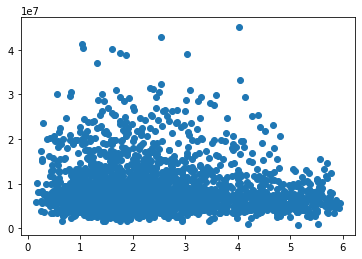

In [100]:
#Scatter plots for 'Distance_to_sc' vs 'price'
plt.scatter(data_reshape['Distance_to_sc'], data_reshape['price'])

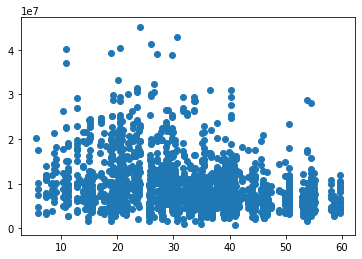

In [101]:
#Scatter plots for 'travel_min_to_CBD' vs 'price'
plt.scatter(data_reshape['travel_min_to_CBD'], data_reshape['price'])

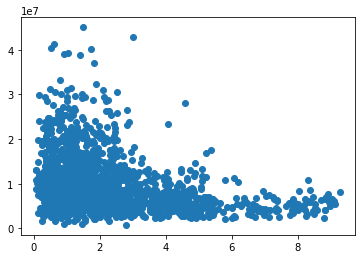

In [102]:
#Scatter plots for 'Distance_to_hospital' vs 'price'
plt.scatter(data_reshape['Distance_to_hospital'], data_reshape['price'])

All the features are continuous and have some outliers as well. Hence, they will need normalizations.

### Histograms of features

Histograms will help us in telling which features need to be normalized. Histograms show us how the data is spread out.

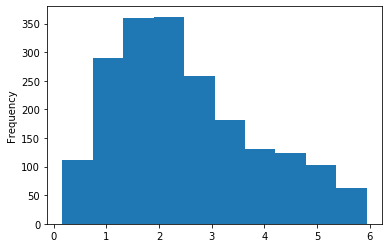

In [103]:
# Histogram for 'Distance_to_sc'
data_reshape['Distance_to_sc'].plot.hist()

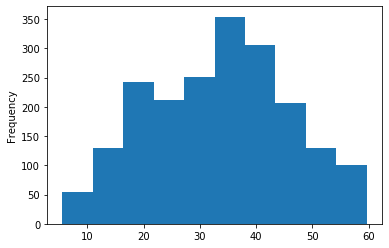

In [104]:
# Histogram for 'travel_min_to_CBD'
data_reshape['travel_min_to_CBD'].plot.hist()

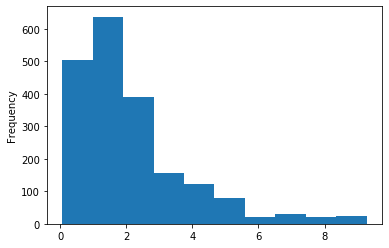

In [105]:
# Histogram for 'Distance_to_hospital'
data_reshape['Distance_to_hospital'].plot.hist()

The histograms for <i>'Distance_to_sc' & 'Distance_to_hospital'</i> are skewed and will have to be transformed.

For <i>'travel_min_to_CBD'</i>,the data is not skewed. So only normalization is needed to remove the outliers and create a better data.

### Root transformation on 'Distance_to_hospital'

Root transformation will be used as the data is right skewed and there are simple counts in our data. We could've also used log transformation but that is better for data with large values. Here, root transformation will be better.

In [106]:
# Root transformation on 'Distance_to_hospital'
hospital_root = []
hospital_list = data_reshape['Distance_to_hospital'].tolist()

for item in hospital_list:
    hospital_root.append(sqrt(item))

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


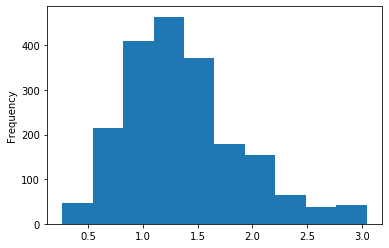

In [107]:
# Histogram for 'Distance_to_hospital'
data_reshape['root_dist_hospital'] = hospital_root
data_reshape['root_dist_hospital'].plot.hist()

After performing root transformation, the skewness is gone. 

### Root transformation on 'Distance_to_sc'

Root transformation will be used as the data is right skewed and there are simple counts in our data. We could've also used log transformation but that is better for daat with large values. Here, root transformation will be better.

In [108]:
# Root transformation on 'Distance_to_sc'
sc_root = []
sc_list = data_reshape['Distance_to_sc'].tolist()

for item in sc_list:
    sc_root.append(sqrt(item))

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


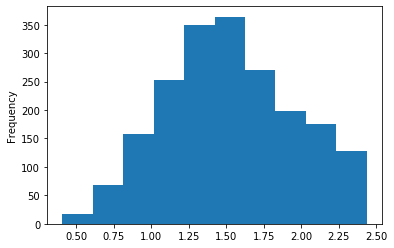

In [109]:
# Histogram for 'Distance_to_hospital'
data_reshape['root_dist_sc'] = sc_root
data_reshape['root_dist_sc'].plot.hist()

After performing root transformation, the skewness is gone. 

### Min-Max Normalization on 'travel_min_to_CBD'

In [110]:
# Min max Normalisation
minmax_scale = preprocessing.MinMaxScaler().fit(data_reshape[['travel_min_to_CBD']])
df_min_max = minmax_scale.transform(data_reshape[['travel_min_to_CBD']])

In [111]:
data_reshape = data_reshape.copy()
data_reshape['travel_min_to_CBD_MinMax'] = df_min_max[:,0]

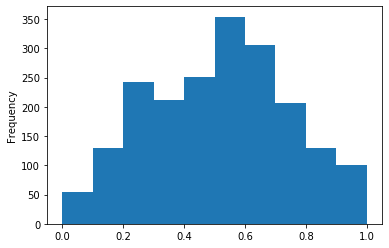

In [112]:
# Plotting the histogram of normalised travel_time_to_CBD
data_reshape['travel_min_to_CBD_MinMax'].plot.hist()

All the data has been converted to a value between 0 and 1. This will help in reducing the effect of the outliers when we create a linear model.

## Conclusion

For task 1, we integrated the data from various data sources and created the '30757983_A3_solution.csv' file as per the final schema specifications.

For task 2, we examined the whether the specified columns would need any normalizations or transformations and then performed Min-Max normalization on 'travel_min_to_CBD' and Root transformation on 'Distance_to_sc' & 'Distance_to_hospital'

# END